In [42]:
import numpy as np
import pandas as pd

# next command ensures that plots appear inside the notebook
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns  # also improves the look of plots
sns.set()
#plt.rcParams['figure.figsize'] = 10, 5  # default hor./vert. size of plots, in inches
#plt.rcParams['lines.markeredgewidth'] = 1  # to fix issue with seaborn box plots; needed after import seaborn

from sklearn.linear_model import LinearRegression  # for linear regression
from sklearn.cluster import KMeans  # for clustering
from sklearn.tree import DecisionTreeClassifier  # for decision tree mining
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from ProcessData import pre_process_raw_data, join_parsed_dataframes
from SmallDate import SmallDate

In [43]:
def pivot_tables(df, index):
    useful_columns_for_pivot = ['Crime ID', "Month", index]
    Usefuldata = df[useful_columns_for_pivot]
    pivot_tables = Usefuldata.pivot_table(index=index, columns='Month', values='Crime ID', aggfunc='count')
    return pivot_tables

def pivot_tables_ward(df, index):
    useful_columns_for_pivot = ['Crime ID', "Ward", index]
    Usefuldata = df[useful_columns_for_pivot]
    pivot_tables_ward = Usefuldata.pivot_table(index=index, columns='Ward', values='Crime ID', aggfunc='count')
    return pivot_tables_ward

In [44]:
df_barnet_all_crimes = pd.read_csv('CrimeData/Processed/Barnet_all_crimes.csv')

df_barnet_all_crimes = df_barnet_all_crimes.fillna('crime')
discontinued_crimes1 = df_barnet_all_crimes['Crime type'] == 'Violent crime'
df_barnet_all_crimes = df_barnet_all_crimes.drop(df_barnet_all_crimes[discontinued_crimes1].index)
discontinued_crimes2 = df_barnet_all_crimes['Crime type'] == 'Public disorder and weapons'
df_barnet_all_crimes = df_barnet_all_crimes.drop(df_barnet_all_crimes[discontinued_crimes2].index)
df_barnet_all_crimes = df_barnet_all_crimes[~((df_barnet_all_crimes['Month'] == '2012-12') | (df_barnet_all_crimes['Month'] == '2013-01') | (df_barnet_all_crimes['Month'] == '2013-02') | (df_barnet_all_crimes['Month'] == '2013-03') | (df_barnet_all_crimes['Month'] == '2013-04'))]
df_barnet_all_crimes


,Unnamed: 0,Crime ID,Month,LSOA code,Crime type,Ward
13804,1896,crime,2013-05,E01000248,Anti-social behaviour,High Barnet
13805,1897,crime,2013-05,E01000248,Anti-social behaviour,High Barnet
13806,1898,67a13d8165bce9a4cf9d2f749ce3bf585f16fabbeb9118...,2013-05,E01000248,Burglary,High Barnet
13807,1899,d5d393991c54f0aeb2581c662a26427427bf9d2260d41f...,2013-05,E01000248,Criminal damage and arson,High Barnet
13808,1900,d15bcc69560e958d2e372b8889fba474d8dece03e57201...,2013-05,E01000248,Criminal damage and arson,High Barnet
...,...,...,...,...,...,...
362591,5019,90cadd02273825d3380deb0025f55315a8e626f701a5bb...,2023-03,E01000143,Shoplifting,Childs Hill
362592,5020,bf49f8f6432a43bd17cb31a0b7d5be5037fbeaeebd3030...,2023-03,E01000143,Violence and sexual offences,Childs Hill
362593,5021,833865fbe9f98701190a32a6f9451c679af0c84488add4...,2023-03,E01000143,Violence and sexual offences,Childs Hill
362594,5022,31698cd303fa318becb1dfbb74aed3ecefdfb49e34346e...,2023-03,E01000143,Violence and sexual offences,Childs Hill


In [45]:



df_pivot_barnet_all_crimes = pivot_tables(df_barnet_all_crimes, index = 'Crime type')

#df_pivot_barnet_all_crimes = df_pivot_barnet_all_crimes.fillna(0)
df_pivot_barnet_all_crimes

Month,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,...,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03
Crime type,,,,,,,,,,,,,,,,,,,,,
Anti-social behaviour,847,918,1100,1005,720,874,803,677,633,629,...,722,778,790,587,1296,577,521,594,569,599
Bicycle theft,16,30,40,25,22,18,9,14,7,15,...,11,19,30,38,21,20,18,6,25,16
Burglary,338,271,303,273,299,332,395,441,317,294,...,195,190,171,189,248,246,228,242,199,231
Criminal damage and arson,168,162,138,162,152,158,151,121,179,163,...,156,163,140,126,148,153,141,167,129,173
Drugs,68,73,88,70,67,135,94,98,109,98,...,61,68,70,55,74,84,72,73,91,73
Other crime,22,12,19,13,33,17,19,26,25,23,...,30,23,27,26,28,28,25,38,21,39
Other theft,321,326,346,275,257,322,315,291,280,277,...,256,266,285,272,266,280,300,282,240,279
Possession of weapons,7,6,7,12,5,14,6,5,7,4,...,9,7,10,8,17,8,7,10,9,7
Public order,60,63,80,51,54,65,73,57,75,89,...,178,175,169,154,156,191,118,144,135,190


<Axes: xlabel='Crime type', ylabel='Crime type'>

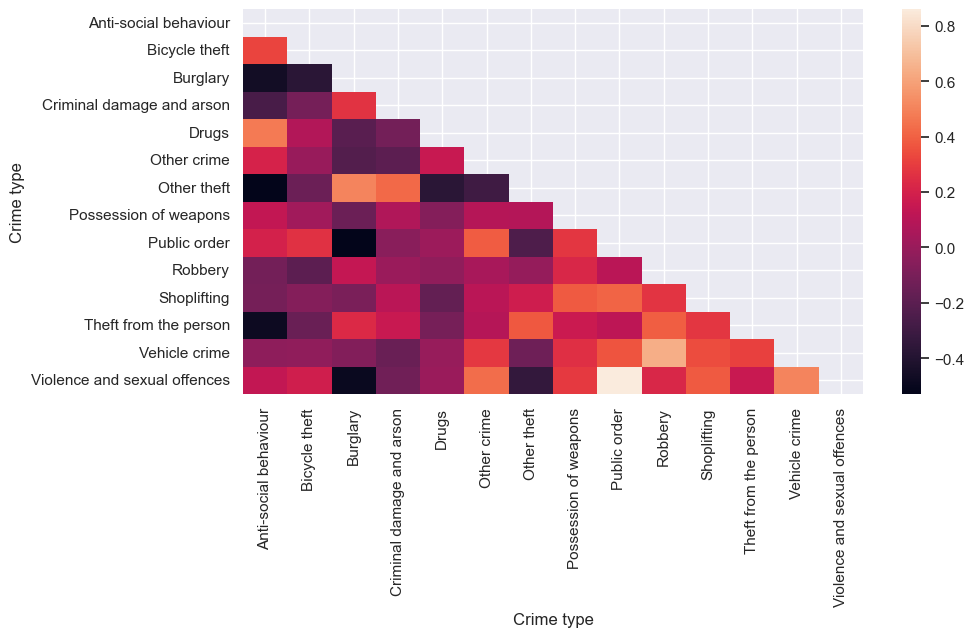

In [46]:
corr_with_all_crimes = df_pivot_barnet_all_crimes.transpose()
mask = np.triu(np.ones_like(corr_with_all_crimes.corr()))

sns.heatmap(corr_with_all_crimes.corr(), mask=mask)

In [47]:
df_pivot_barnet_all_crimes_ward = pivot_tables_ward(df_barnet_all_crimes, index = 'Crime type')

#df_pivot_barnet_all_crimes = df_pivot_barnet_all_crimes.fillna(0)
df_pivot_barnet_all_crimes_ward

Ward,Brunswick Park,Burnt Oak,Childs Hill,Colindale,Coppetts,East Barnet,East Finchley,Edgware,Finchley Church End,Garden Suburb,...,Hale,Hendon,High Barnet,Mill Hill,Oakleigh,Totteridge,Underhill,West Finchley,West Hendon,Woodhouse
Crime type,,,,,,,,,,,,,,,,,,,,,
Anti-social behaviour,2405,6200,7651,8598,4165,3162,3276,5475,2989,2914,...,3576,5494,3694,4150,2623,2627,4381,4686,5218,3624
Bicycle theft,40,138,243,203,102,56,130,140,87,132,...,65,175,81,109,39,68,61,127,148,111
Burglary,1285,1474,2696,1550,1398,1227,1199,1362,1675,1725,...,1354,1904,1343,1845,1437,1280,1238,1371,1760,1554
Criminal damage and arson,581,1405,1397,1504,1043,848,717,1048,606,646,...,727,1102,855,854,645,486,949,811,1198,1077
Drugs,252,633,513,1044,359,264,200,331,219,175,...,294,568,302,394,225,178,347,341,845,497
Other crime,111,204,210,229,138,138,82,200,87,96,...,135,168,134,139,107,60,106,155,202,140
Other theft,871,1215,2626,1867,2337,889,910,2782,836,1571,...,1329,1687,1461,2519,1153,949,935,1446,2817,1882
Possession of weapons,41,86,92,120,63,62,39,48,29,25,...,43,76,42,46,31,32,51,45,96,76
Public order,466,943,1371,1254,803,580,481,938,492,538,...,510,963,746,695,450,372,701,650,1059,828


<Axes: xlabel='Crime type', ylabel='Crime type'>

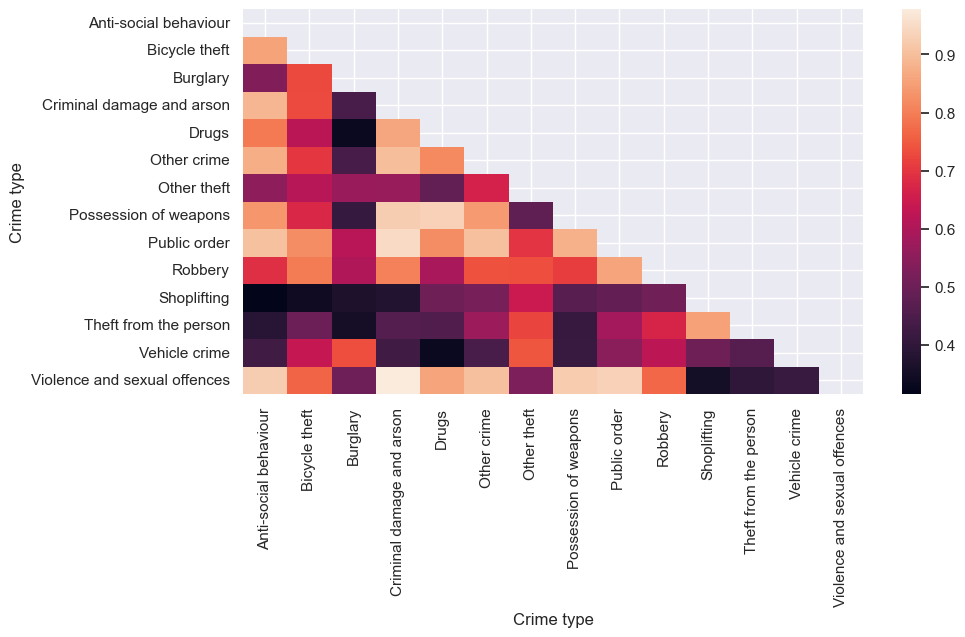

In [48]:
corr_with_all_crimes_ward = df_pivot_barnet_all_crimes_ward.transpose()
mask = np.triu(np.ones_like(corr_with_all_crimes_ward.corr()))

sns.heatmap(corr_with_all_crimes_ward.corr(), mask=mask)

In [49]:
row_to_correlate = df_pivot_barnet_all_crimes.loc['Burglary']
row_to_correlate = pd.DataFrame(row_to_correlate)
row_to_correlate = row_to_correlate.transpose()

row_to_correlate_ward = df_pivot_barnet_all_crimes_ward.loc['Burglary']
row_to_correlate_ward = pd.DataFrame(row_to_correlate_ward)
row_to_correlate_ward = row_to_correlate_ward.transpose()

row_to_correlate

Month,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,...,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03
Burglary,338,271,303,273,299,332,395,441,317,294,...,195,190,171,189,248,246,228,242,199,231


In [50]:
corr_burg_with_other_crimes = df_pivot_barnet_all_crimes.corrwith(row_to_correlate.iloc[0], axis=1)
corr_burg_with_other_crimes = pd.DataFrame(corr_burg_with_other_crimes)
corr_burg_with_other_crimes = corr_burg_with_other_crimes.fillna(0)
corr_burg_with_other_crimes = corr_burg_with_other_crimes.rename(columns={0: "Correlation Coefficient with Burglaries over time"})

corr_burg_with_other_crimes_ward = df_pivot_barnet_all_crimes_ward.corrwith(row_to_correlate_ward.iloc[0], axis=1)
corr_burg_with_other_crimes_ward = pd.DataFrame(corr_burg_with_other_crimes_ward)
corr_burg_with_other_crimes_ward = corr_burg_with_other_crimes_ward.fillna(0)
corr_burg_with_other_crimes_ward = corr_burg_with_other_crimes_ward.rename(columns={0: "Correlation Coefficient with Burglaries per location"})

corr_burg_with_other_crimes

,Correlation Coefficient with Burglaries over time
Crime type,
Anti-social behaviour,-0.460842
Bicycle theft,-0.375020
Burglary,1.000000
Criminal damage and arson,0.264612
Drugs,-0.203769
Other crime,-0.227064
Other theft,0.505065
Possession of weapons,-0.147881
Public order,-0.528679


<Axes: ylabel='Crime type'>

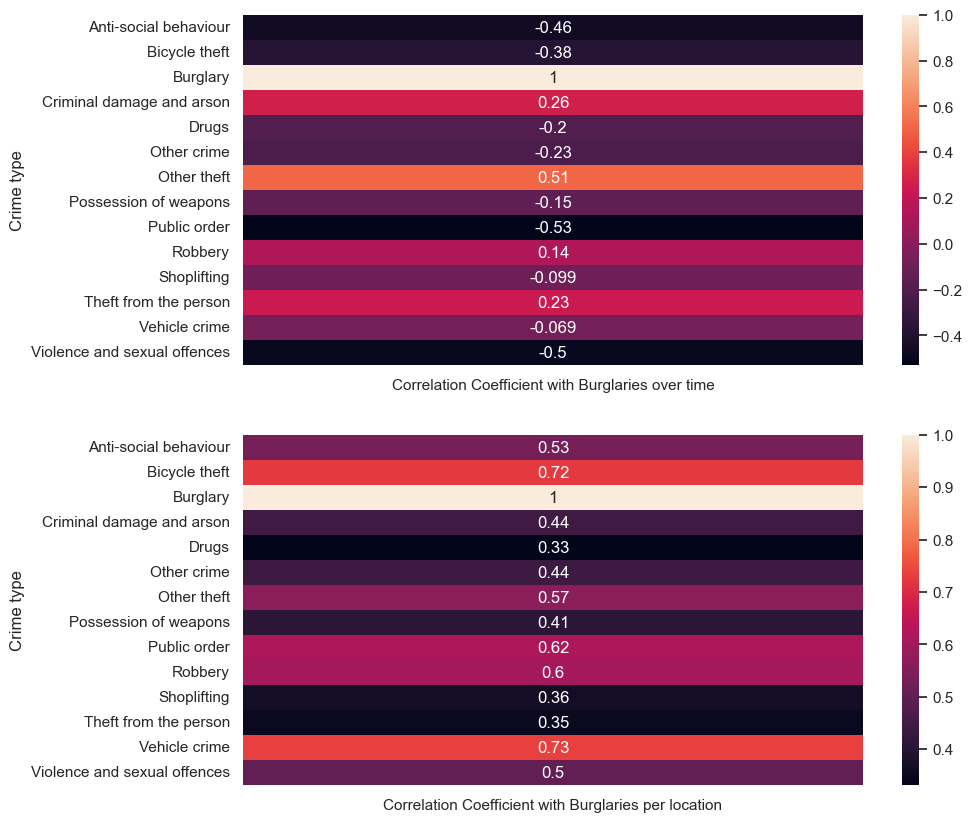

In [53]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10)) 
sns.heatmap(data=corr_burg_with_other_crimes, annot=True, ax=ax[0])
sns.heatmap(data=corr_burg_with_other_crimes_ward, annot=True, ax=ax[1])

# Analysis
In conclusion, most crimes only have a low correlation with burglaries, surprisingly theft from a person has the lowest correlation with burglaries (there was no data for anti-social behaviour). However, there are some crime types with moderate correlation. Public order and violence/sexual offences has a moderate negative correlation while other theft has a moderate positive correlation. Hence, I'm going to continue with the data analysis with the wards between the burglaries and the three other crimes I've mentioned.

In [160]:
df_wards_burglaries = pd.read_csv('CrimeData/Processed/Pivot_December_2012_to_march_2023.csv')
df_wards_burglaries = df_wards_burglaries.set_index('Ward')
#df_wards_burglaries = df_wards_burglaries.rename(columns={"Ward": "Ward Burglaries"})
# df_wards_burglaries = df_wards_burglaries.transpose()
df_wards_burglaries

,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,...,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03
Ward,,,,,,,,,,,,,,,,,,,,,
Brunswick Park,16,28,22,16,20,10,10,8,13,8,...,4,3,6,9,9,4,5,7,14,13
Burnt Oak,11,13,7,23,13,12,9,22,16,21,...,17,6,9,7,6,14,12,11,4,10
Childs Hill,25,33,17,30,26,20,26,22,21,22,...,21,16,19,24,28,40,28,26,25,20
Colindale,12,21,24,20,23,9,16,13,12,8,...,11,19,15,15,17,10,16,18,14,16
Coppetts,20,32,19,17,16,13,9,15,20,11,...,8,9,8,9,15,7,4,17,4,10
East Barnet,25,20,21,19,17,14,9,10,6,14,...,6,5,2,6,10,5,11,9,5,8
East Finchley,9,12,13,8,12,7,6,16,2,10,...,9,7,6,12,4,3,6,5,5,9
Edgware,15,18,15,14,12,13,8,24,12,15,...,15,7,7,12,14,8,8,8,9,15
Finchley Church End,7,17,23,22,12,19,5,11,20,11,...,6,7,9,8,10,7,15,10,16,18


In [161]:
df_wards_public_order = df_barnet_all_crimes[df_barnet_all_crimes['Crime type'].str.contains('Public order')]
df_wards_public_order = pivot_tables(df_wards_public_order,index="Ward")
df_wards_public_order = df_wards_public_order.fillna(0)
df_wards_public_order

Month,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,...,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03
Ward,,,,,,,,,,,,,,,,,,,,,
Brunswick Park,1.0,2.0,0.0,1.0,3.0,0.0,2.0,2.0,1.0,1.0,...,9.0,9.0,7.0,6.0,5.0,15.0,3.0,1.0,3.0,1.0
Burnt Oak,3.0,10.0,3.0,3.0,5.0,5.0,3.0,3.0,6.0,5.0,...,10.0,7.0,11.0,10.0,8.0,9.0,12.0,5.0,10.0,6.0
Childs Hill,1.0,3.0,5.0,3.0,7.0,5.0,6.0,5.0,8.0,7.0,...,8.0,13.0,17.0,15.0,12.0,10.0,3.0,12.0,14.0,20.0
Colindale,5.0,8.0,6.0,5.0,6.0,6.0,9.0,3.0,7.0,6.0,...,31.0,15.0,20.0,18.0,15.0,16.0,11.0,14.0,15.0,22.0
Coppetts,5.0,0.0,4.0,2.0,1.0,4.0,8.0,1.0,5.0,2.0,...,18.0,9.0,5.0,2.0,11.0,4.0,4.0,5.0,7.0,22.0
East Barnet,2.0,4.0,3.0,2.0,0.0,2.0,0.0,3.0,5.0,4.0,...,5.0,8.0,2.0,6.0,3.0,5.0,3.0,10.0,4.0,7.0
East Finchley,4.0,1.0,3.0,2.0,2.0,0.0,2.0,1.0,4.0,1.0,...,6.0,4.0,6.0,1.0,2.0,12.0,4.0,5.0,3.0,2.0
Edgware,4.0,5.0,3.0,0.0,4.0,3.0,2.0,2.0,3.0,7.0,...,4.0,13.0,8.0,7.0,13.0,11.0,9.0,6.0,6.0,13.0
Finchley Church End,1.0,0.0,2.0,1.0,1.0,1.0,2.0,2.0,3.0,4.0,...,3.0,3.0,4.0,1.0,5.0,7.0,3.0,4.0,1.0,6.0


In [162]:
df_wards_v_and_so = df_barnet_all_crimes[df_barnet_all_crimes['Crime type'].str.contains('Violence and sexual offences')]
df_wards_v_and_so = pivot_tables(df_wards_v_and_so,index="Ward")
df_wards_v_and_so = df_wards_v_and_so.fillna(0)
df_wards_v_and_so

Month,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,...,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03
Ward,,,,,,,,,,,,,,,,,,,,,
Brunswick Park,13,6,13,13,8,11,10,12,6,12,...,27,24,26,11,28,27,17,17,15,16
Burnt Oak,31,45,33,21,35,27,21,36,31,34,...,53,46,37,40,70,63,50,47,36,35
Childs Hill,34,17,18,37,20,24,34,34,37,38,...,67,54,46,49,39,57,49,49,48,46
Colindale,28,23,28,19,19,21,44,22,27,26,...,63,73,70,64,54,84,64,75,60,67
Coppetts,13,18,20,25,18,19,16,22,16,26,...,41,32,37,43,31,26,33,36,38,34
East Barnet,16,17,14,8,14,16,7,20,15,5,...,15,26,25,25,20,17,36,18,24,25
East Finchley,11,11,7,17,6,10,11,11,6,11,...,25,29,18,28,16,21,25,33,30,24
Edgware,20,32,18,19,9,16,20,16,12,9,...,29,34,28,25,30,35,27,27,43,44
Finchley Church End,10,8,6,15,5,5,13,12,14,12,...,24,24,23,25,25,28,13,25,16,25


In [163]:
df_wards_other_theft = df_barnet_all_crimes[df_barnet_all_crimes['Crime type'].str.contains('Other theft')]
df_wards_other_theft = pivot_tables(df_wards_other_theft,index="Ward")
df_wards_other_theft = df_wards_other_theft.fillna(0)
df_wards_other_theft

Month,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,...,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03
Ward,,,,,,,,,,,,,,,,,,,,,
Brunswick Park,7.0,11.0,9.0,10.0,13.0,4.0,7.0,10.0,3.0,7.0,...,11.0,10.0,5.0,13.0,13.0,5.0,7.0,8.0,10.0,10.0
Burnt Oak,9.0,12.0,11.0,15.0,9.0,4.0,8.0,13.0,3.0,3.0,...,13.0,9.0,16.0,16.0,12.0,6.0,11.0,8.0,6.0,16.0
Childs Hill,38.0,34.0,35.0,45.0,45.0,32.0,22.0,31.0,27.0,25.0,...,24.0,17.0,24.0,22.0,21.0,30.0,25.0,21.0,22.0,20.0
Colindale,14.0,12.0,14.0,11.0,13.0,14.0,18.0,23.0,10.0,7.0,...,19.0,23.0,27.0,21.0,17.0,26.0,18.0,22.0,25.0,22.0
Coppetts,31.0,12.0,17.0,29.0,30.0,31.0,23.0,25.0,8.0,18.0,...,11.0,13.0,14.0,5.0,16.0,7.0,19.0,10.0,4.0,10.0
East Barnet,14.0,11.0,4.0,11.0,6.0,6.0,7.0,3.0,7.0,9.0,...,8.0,7.0,10.0,10.0,6.0,7.0,11.0,8.0,6.0,10.0
East Finchley,12.0,9.0,14.0,9.0,16.0,9.0,14.0,11.0,7.0,11.0,...,7.0,10.0,11.0,2.0,8.0,13.0,9.0,8.0,8.0,14.0
Edgware,32.0,33.0,36.0,27.0,17.0,25.0,21.0,24.0,28.0,14.0,...,16.0,22.0,19.0,22.0,14.0,11.0,20.0,19.0,12.0,19.0
Finchley Church End,14.0,9.0,6.0,14.0,5.0,4.0,9.0,5.0,7.0,10.0,...,6.0,14.0,8.0,8.0,4.0,9.0,15.0,12.0,5.0,6.0


In [180]:
corr_wards_with_burg_and_po = pd.concat([df_wards_burglaries.transpose(), df_wards_public_order.transpose()], axis=1).corr()
corr_wards_with_burg_and_v_and_so = pd.concat([df_wards_burglaries.transpose(), df_wards_v_and_so.transpose()], axis=1).corr()
corr_wards_with_burg_and_ot = pd.concat([df_wards_burglaries.transpose(), df_wards_other_theft.transpose()], axis=1).corr()
corr_wards_with_burg_and_po

Ward,Brunswick Park,Burnt Oak,Childs Hill,Colindale,Coppetts,East Barnet,East Finchley,Edgware,Finchley Church End,Garden Suburb,...,Hale,Hendon,High Barnet,Mill Hill,Oakleigh,Totteridge,Underhill,West Finchley,West Hendon,Woodhouse
Ward,,,,,,,,,,,,,,,,,,,,,
Brunswick Park,1.000000,0.207407,0.309355,0.012357,0.565335,0.644193,0.489063,0.253639,0.479990,0.213005,...,-0.090964,-0.196623,-0.263705,-0.147011,-0.257017,-0.007552,-0.050213,-0.192820,-0.485370,-0.324817
Burnt Oak,0.207407,1.000000,0.200522,-0.043882,0.322492,0.310014,0.238113,0.422472,0.194298,0.097285,...,-0.019357,-0.156488,-0.029411,-0.163239,-0.009439,0.015310,0.073228,-0.149720,-0.264112,-0.267885
Childs Hill,0.309355,0.200522,1.000000,-0.139160,0.228188,0.305598,0.200015,0.263978,0.251226,0.232192,...,0.041721,-0.107197,-0.132729,0.000823,-0.080014,-0.097989,0.041928,-0.279481,-0.248371,-0.251811
Colindale,0.012357,-0.043882,-0.139160,1.000000,0.103754,-0.073686,0.072530,0.018329,0.043081,0.045862,...,-0.020033,0.311949,0.041743,0.064574,0.126466,0.084938,-0.129222,0.159892,0.035716,0.159018
Coppetts,0.565335,0.322492,0.228188,0.103754,1.000000,0.429703,0.311971,0.334351,0.256797,0.252018,...,-0.017166,-0.221450,-0.191562,-0.134185,-0.253902,-0.109689,-0.028670,-0.192683,-0.381878,-0.194628
East Barnet,0.644193,0.310014,0.305598,-0.073686,0.429703,1.000000,0.344721,0.254811,0.299153,0.226615,...,-0.201543,-0.149724,-0.163599,-0.119920,-0.179275,-0.008488,-0.005036,-0.220627,-0.330276,-0.299656
East Finchley,0.489063,0.238113,0.200015,0.072530,0.311971,0.344721,1.000000,0.109466,0.293511,0.219126,...,-0.082053,-0.067715,-0.082833,-0.088791,-0.021251,0.005184,0.006778,-0.191884,-0.221772,-0.267502
Edgware,0.253639,0.422472,0.263978,0.018329,0.334351,0.254811,0.109466,1.000000,0.180119,0.285926,...,0.072346,-0.166129,-0.056314,-0.060042,-0.127491,-0.017489,0.081964,-0.169522,-0.207551,-0.192881
Finchley Church End,0.479990,0.194298,0.251226,0.043081,0.256797,0.299153,0.293511,0.180119,1.000000,0.246698,...,-0.059383,-0.054181,-0.109081,-0.151796,-0.209034,0.054825,-0.072272,-0.063207,-0.251210,-0.190056


Text(0.5, 1.0, 'Correlation Coefficient of Wards between Burglaries and Other theft')

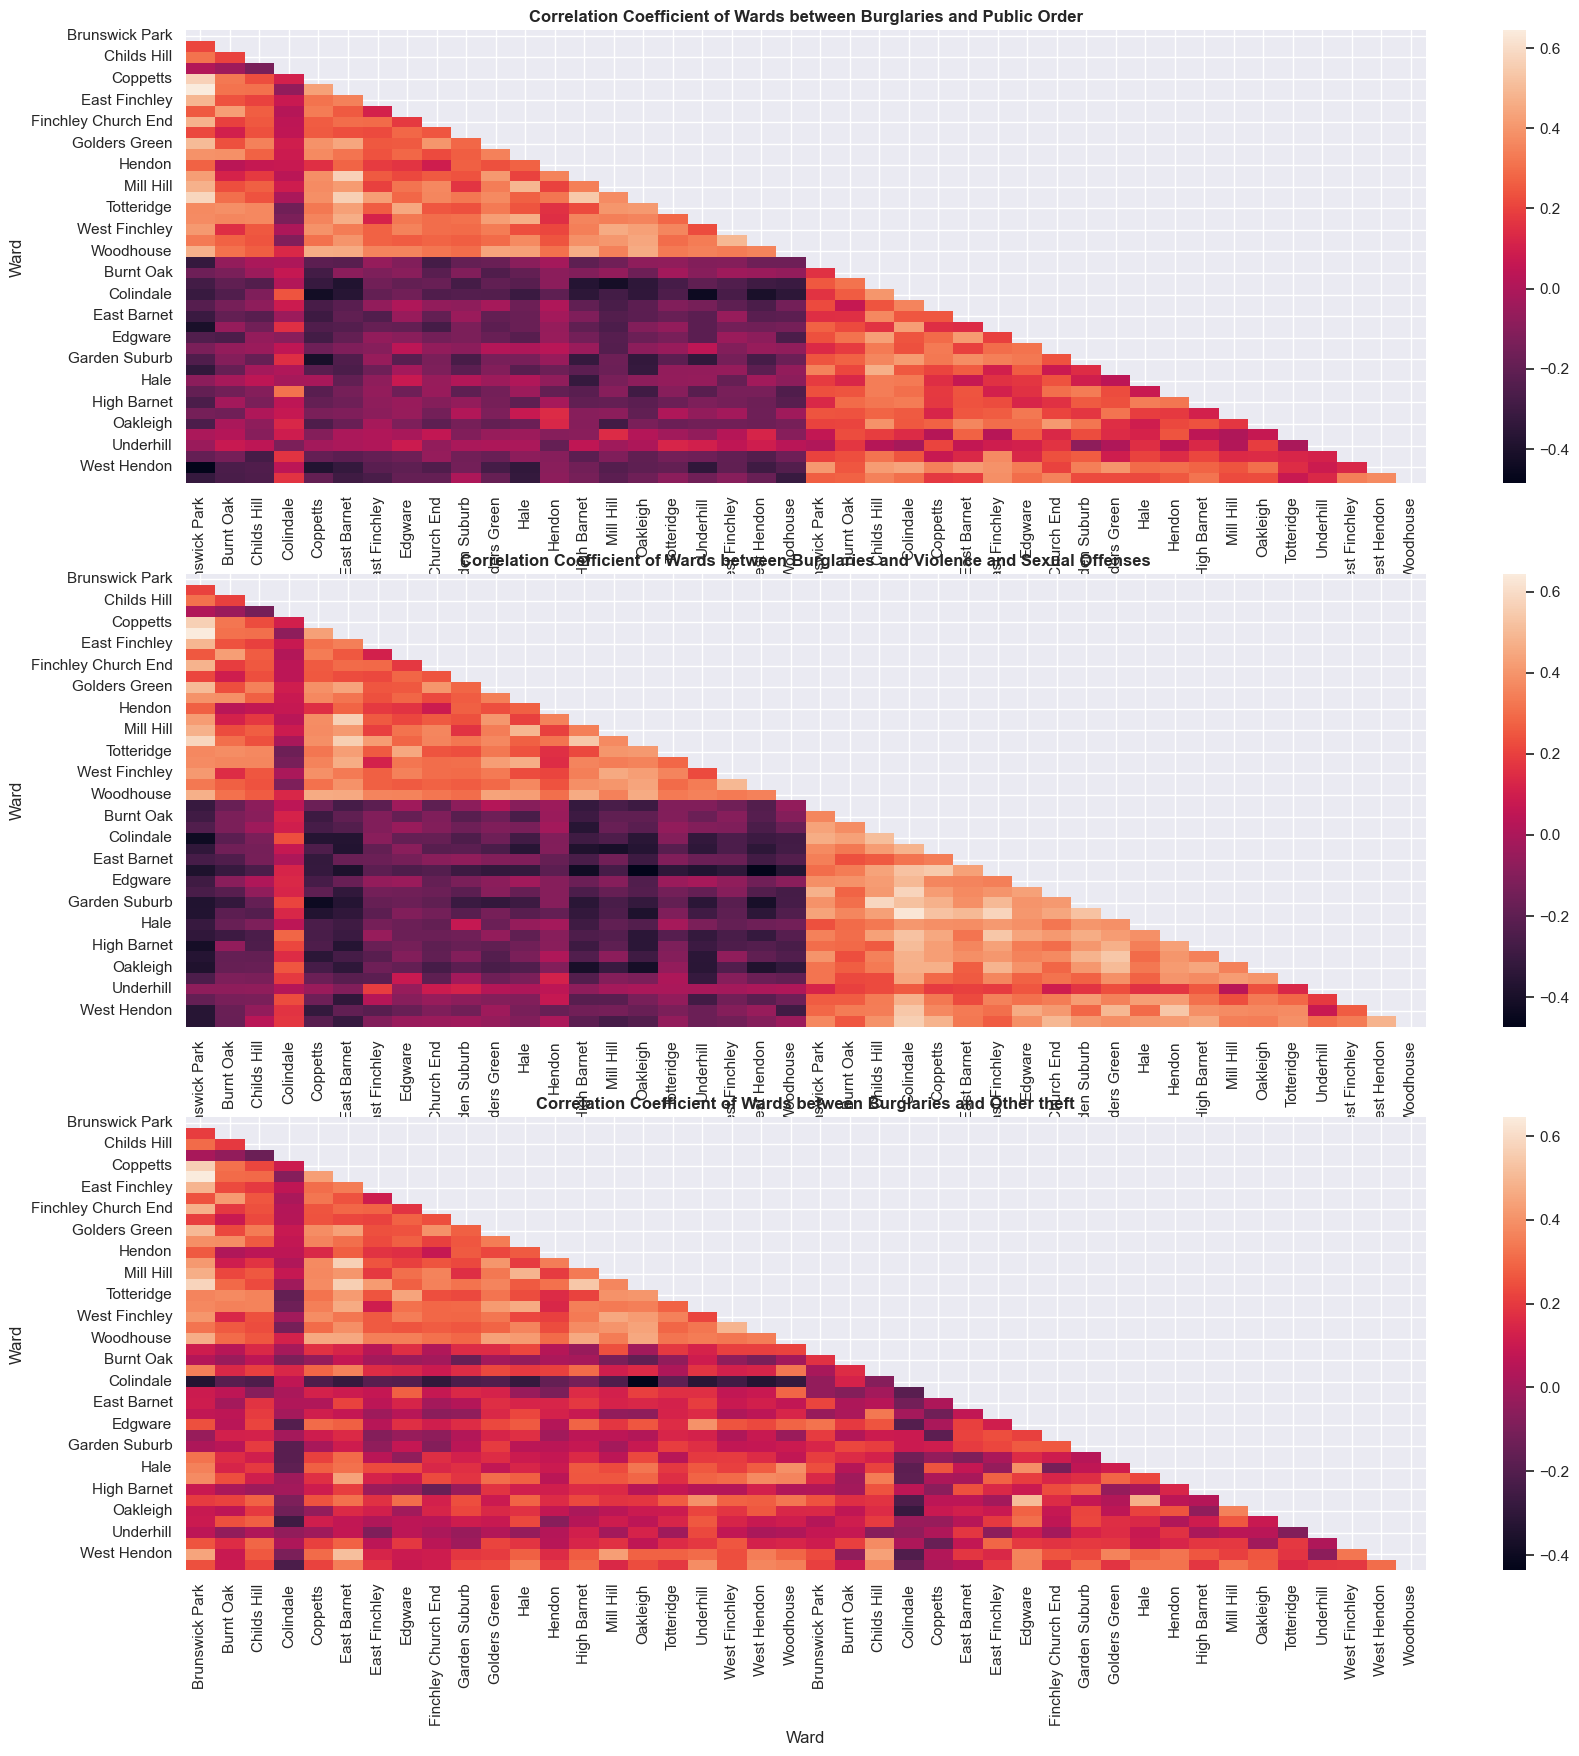

In [179]:
mask1 = np.triu(np.ones_like(corr_wards_with_burg_and_po))
mask2 = np.triu(np.ones_like(corr_wards_with_burg_and_v_and_so))
mask3 = np.triu(np.ones_like(corr_wards_with_burg_and_ot))
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20,20))
sns.heatmap(corr_wards_with_burg_and_po, mask=mask1, ax=ax[0])
sns.heatmap(corr_wards_with_burg_and_v_and_so, mask=mask2, ax=ax[1])
sns.heatmap(corr_wards_with_burg_and_ot, mask=mask3, ax=ax[2])
ax[0].set_title("Correlation Coefficient of Wards between Burglaries and Public Order", fontweight='bold')
ax[1].set_title("Correlation Coefficient of Wards between Burglaries and Violence and Sexual Offenses", fontweight='bold')
ax[2].set_title("Correlation Coefficient of Wards between Burglaries and Other theft", fontweight='bold')

# Analysis II
This is practically unreadable because there are too many Wards to account for in a heatmap, it would be better to create a scatter plot of each crime at their respective wards and see how they correlate together. But, I was on a time constraint.

In [181]:
df_wards_antis_b = df_barnet_all_crimes[df_barnet_all_crimes['Crime type'].str.contains('Anti-social behaviour')]
df_wards_antis_b

,Unnamed: 0,Crime ID,Month,LSOA code,Crime type,Ward
0,1830,NaN,2012-12,E01000248,Anti-social behaviour,High Barnet
1,1831,NaN,2012-12,E01000248,Anti-social behaviour,High Barnet
10,1840,NaN,2012-12,E01000249,Anti-social behaviour,High Barnet
13,1843,NaN,2012-12,E01000250,Anti-social behaviour,High Barnet
14,1844,NaN,2012-12,E01000250,Anti-social behaviour,High Barnet
...,...,...,...,...,...,...
362561,4989,NaN,2023-03,E01000140,Anti-social behaviour,Childs Hill
362562,4990,NaN,2023-03,E01000140,Anti-social behaviour,Childs Hill
362563,4991,NaN,2023-03,E01000140,Anti-social behaviour,Childs Hill
362581,5009,NaN,2023-03,E01000143,Anti-social behaviour,Childs Hill
